In [5]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# # Clear all DataFrames by setting them to None
# # amazon_sale_report_df = None
# cloud_warehouse_comparison_chart_df = None
# expense_iigf_df = None
# international_sale_report_df = None
# may_2022_df = None
# pl_march_2021_df = None
# sale_report_df = None


In [7]:
import pandas as pd

# Specify the data types for columns in Amazon Sale Report
dtype_spec = {
    'Order ID': 'str',
    'Date': 'str',
    'Status': 'str',
    'Fulfilment': 'str',
    'Sales Channel': 'str',
    'ship-service-level': 'str',
    'Style': 'str',
    'SKU': 'str',
    'Category': 'str',
    'Size': 'str',
    'ASIN': 'str',
    'Courier Status': 'str',
    'Qty': 'float',
    'currency': 'str',
    'Amount': 'float',
    'ship-city': 'str',
    'ship-state': 'str',
    'ship-postal-code': 'str',
    'ship-country': 'str',
    'promotion-ids': 'str',
    'B2B': 'bool',
    'fulfilled-by': 'str'
}

# Reload the CSV files into DataFrames with specified data types

amazon_sale_report_df = pd.read_csv('amazon_sale_report.csv', dtype=dtype_spec, low_memory=False)
cloud_warehouse_comparison_chart_df = pd.read_csv('cloud_warehouse_comparison_chart.csv')
expense_iigf_df = pd.read_csv('expense_iigf.csv')
international_sale_report_df = pd.read_csv('international_sale_report.csv')
may_2022_df = pd.read_csv('may_2022.csv')
pl_march_2021_df = pd.read_csv('pl_march_2021.csv')
sale_report_df = pd.read_csv('sale_report.csv')




Data Cleaning 

In [8]:
amazon_sale_report_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [9]:
print(amazon_sale_report_df.isnull().sum())

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64


In [10]:
# Handle missing values
amazon_sale_report_df['Courier Status'] = amazon_sale_report_df['Courier Status'].fillna('unknown')
amazon_sale_report_df['currency'] = amazon_sale_report_df['currency'].fillna('unknown')
amazon_sale_report_df['Amount'] = amazon_sale_report_df['Amount'].fillna(0)
amazon_sale_report_df['ship-city'] = amazon_sale_report_df['ship-city'].fillna('unknown')
amazon_sale_report_df['ship-state'] = amazon_sale_report_df['ship-state'].fillna('unknown')
amazon_sale_report_df['ship-postal-code'] = amazon_sale_report_df['ship-postal-code'].fillna('unknown')
amazon_sale_report_df['ship-country'] = amazon_sale_report_df['ship-country'].fillna('unknown')
amazon_sale_report_df['promotion-ids'] = amazon_sale_report_df['promotion-ids'].fillna('none')
amazon_sale_report_df['fulfilled-by'] = amazon_sale_report_df['fulfilled-by'].fillna('unknown')


In [11]:
amazon_sale_report_df.drop_duplicates(inplace=True)

In [12]:
amazon_sale_report_df['Category'] = amazon_sale_report_df['Category'].str.lower().str.strip()
amazon_sale_report_df['Status'] = amazon_sale_report_df['Status'].str.lower().str.strip()
amazon_sale_report_df['Fulfilment'] = amazon_sale_report_df['Fulfilment'].str.lower().str.strip()
amazon_sale_report_df['Style'] = amazon_sale_report_df['Style'].str.lower().str.strip()
amazon_sale_report_df['SKU'] = amazon_sale_report_df['SKU'].str.lower().str.strip()
amazon_sale_report_df['Courier Status'] = amazon_sale_report_df['Courier Status'].str.lower().str.strip()
amazon_sale_report_df['currency'] = amazon_sale_report_df['currency'].str.lower().str.strip()

# Convert 'Date' column to datetime format
amazon_sale_report_df['Date'] = pd.to_datetime(amazon_sale_report_df['Date'], format='%m-%d-%y')

# Create new columns
amazon_sale_report_df['Month'] = amazon_sale_report_df['Date'].dt.month
amazon_sale_report_df['Weekday'] = amazon_sale_report_df['Date'].dt.weekday

In [13]:
amazon_sale_report_df.drop(columns=['Unnamed: 22'], inplace=True)


In [14]:
amazon_sale_report_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Month,Weekday
0,0,405-8078784-5731545,2022-04-30,cancelled,merchant,Amazon.in,Standard,set389,set389-kr-np-s,set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,none,False,Easy Ship,4,5
1,1,171-9198151-1101146,2022-04-30,shipped - delivered to buyer,merchant,Amazon.in,Standard,jne3781,jne3781-kr-xxxl,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,4,5
2,2,404-0687676-7273146,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3371,jne3371-kr-xl,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,unknown,4,5
3,3,403-9615377-8133951,2022-04-30,cancelled,merchant,Amazon.in,Standard,j0341,j0341-dr-l,western dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,none,False,Easy Ship,4,5
4,4,407-1069790-7240320,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3671,jne3671-tu-xxxl,top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,none,False,unknown,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,shipped,amazon,Amazon.in,Expedited,jne3697,jne3697-kr-xl,kurta,...,517.00,HYDERABAD,TELANGANA,500013.0,IN,none,False,unknown,5,1
128971,128971,402-9551604-7544318,2022-05-31,shipped,amazon,Amazon.in,Expedited,set401,set401-kr-np-m,set,...,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,unknown,5,1
128972,128972,407-9547469-3152358,2022-05-31,shipped,amazon,Amazon.in,Expedited,j0157,j0157-dr-xxl,western dress,...,690.00,HYDERABAD,TELANGANA,500049.0,IN,none,False,unknown,5,1
128973,128973,402-6184140-0545956,2022-05-31,shipped,amazon,Amazon.in,Expedited,j0012,j0012-skd-xs,set,...,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,unknown,5,1


In [15]:
print(cloud_warehouse_comparison_chart_df.isnull().sum())

index          0
Shiprocket    29
Unnamed: 1     9
INCREFF       22
dtype: int64


In [16]:

# Convert columns to numeric, forcing non-numeric values to NaN
cloud_warehouse_comparison_chart_df['Shiprocket'] = pd.to_numeric(cloud_warehouse_comparison_chart_df['Shiprocket'], errors='coerce')
cloud_warehouse_comparison_chart_df['INCREFF'] = pd.to_numeric(cloud_warehouse_comparison_chart_df['INCREFF'], errors='coerce')

# Handle missing values without using inplace=True
cloud_warehouse_comparison_chart_df['Shiprocket'] = cloud_warehouse_comparison_chart_df['Shiprocket'].fillna(cloud_warehouse_comparison_chart_df['Shiprocket'].mean())
cloud_warehouse_comparison_chart_df['INCREFF'] = cloud_warehouse_comparison_chart_df['INCREFF'].fillna(cloud_warehouse_comparison_chart_df['INCREFF'].mean())

# Remove duplicate rows
cloud_warehouse_comparison_chart_df.drop_duplicates(inplace=True)

# Drop the 'Unnamed: 1' column
if 'Unnamed: 1' in cloud_warehouse_comparison_chart_df.columns:
    cloud_warehouse_comparison_chart_df.drop(columns=['Unnamed: 1'], inplace=True)

In [17]:
cloud_warehouse_comparison_chart_df['Shiprocket'] = cloud_warehouse_comparison_chart_df['Shiprocket'].fillna(cloud_warehouse_comparison_chart_df['Shiprocket'].mean())


In [18]:
cloud_warehouse_comparison_chart_df.drop(columns=['Shiprocket'], inplace=True)

Cleaning of EXPENSE_IIGF.CSV


In [19]:
print(expense_iigf_df.isnull().sum())

index              0
Recived Amount    11
Unnamed: 1        11
Expance            2
Unnamed: 3         0
dtype: int64


In [20]:
# Handle missing values without using inplace=True
expense_iigf_df['Recived Amount'] = expense_iigf_df['Recived Amount'].fillna('unknown')
expense_iigf_df['Unnamed: 1'] = expense_iigf_df['Unnamed: 1'].fillna(0)
expense_iigf_df['Expance'] = expense_iigf_df['Expance'].fillna('unknown')


In [21]:
# Drop the first row containing headers (if needed)
# expense_iigf_df.drop(0, inplace=True)

# Handle missing values without using inplace=True
expense_iigf_df['Recived Amount'] = expense_iigf_df['Recived Amount'].fillna('unknown')
expense_iigf_df['Unnamed: 1'] = expense_iigf_df['Unnamed: 1'].fillna(0)
expense_iigf_df['Expance'] = expense_iigf_df['Expance'].fillna('unknown')

# Rename columns
expense_iigf_df.rename(columns={
    'Recived Amount': 'Received_Amount',
    'Unnamed: 1': 'Received_Amount_Value',
    'Expance': 'Expense',
    'Unnamed: 3': 'Expense_Value'
}, inplace=True)

# Remove duplicate rows
expense_iigf_df.drop_duplicates(inplace=True)

In [22]:
print(expense_iigf_df.isnull().sum())

index                    0
Received_Amount          0
Received_Amount_Value    0
Expense                  0
Expense_Value            0
dtype: int64


Data cleaning for the international_sale_report.csv

In [23]:
print(international_sale_report_df.isnull().sum())

index           0
DATE            1
Months         25
CUSTOMER     1040
Style        1040
SKU          2474
Size         1040
PCS          1040
RATE         1040
GROSS AMT    1040
dtype: int64


In [24]:
# Handle missing values without using inplace=True
international_sale_report_df['DATE'] = international_sale_report_df['DATE'].fillna('unknown')
international_sale_report_df['Months'] = international_sale_report_df['Months'].fillna('unknown')
international_sale_report_df['CUSTOMER'] = international_sale_report_df['CUSTOMER'].fillna('unknown')
international_sale_report_df['Style'] = international_sale_report_df['Style'].fillna('unknown')
international_sale_report_df['SKU'] = international_sale_report_df['SKU'].fillna('unknown')
international_sale_report_df['Size'] = international_sale_report_df['Size'].fillna('unknown')
international_sale_report_df['PCS'] = international_sale_report_df['PCS'].fillna(0)
international_sale_report_df['RATE'] = international_sale_report_df['RATE'].fillna(0)
international_sale_report_df['GROSS AMT'] = international_sale_report_df['GROSS AMT'].fillna(0)


In [25]:

# Remove duplicate rows
international_sale_report_df.drop_duplicates(inplace=True)

# Standardize text columns
international_sale_report_df['CUSTOMER'] = international_sale_report_df['CUSTOMER'].str.lower().str.strip()
international_sale_report_df['Style'] = international_sale_report_df['Style'].str.lower().str.strip()
international_sale_report_df['SKU'] = international_sale_report_df['SKU'].str.lower().str.strip()
international_sale_report_df['Size'] = international_sale_report_df['Size'].str.lower().str.strip()

# Convert data types if necessary
international_sale_report_df['DATE'] = pd.to_datetime(international_sale_report_df['DATE'], errors='coerce')
international_sale_report_df['PCS'] = pd.to_numeric(international_sale_report_df['PCS'], errors='coerce')
international_sale_report_df['RATE'] = pd.to_numeric(international_sale_report_df['RATE'], errors='coerce')
international_sale_report_df['GROSS AMT'] = pd.to_numeric(international_sale_report_df['GROSS AMT'], errors='coerce')

# Create new columns (if necessary)
international_sale_report_df['Month'] = international_sale_report_df['DATE'].dt.month
international_sale_report_df['Year'] = international_sale_report_df['DATE'].dt.year

/var/folders/w0/31yxj0vn2vj3g6478zc3ly3h0000gp/T/ipykernel_8782/2502729519.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  international_sale_report_df['DATE'] = pd.to_datetime(international_sale_report_df['DATE'], errors='coerce')


In [26]:
# Convert data types with specified format for DATE
date_format = '%Y-%m-%d'  # Specify the appropriate date format
international_sale_report_df['DATE'] = pd.to_datetime(international_sale_report_df['DATE'], format=date_format, errors='coerce')

# Create new columns
international_sale_report_df['Month'] = international_sale_report_df['DATE'].dt.month
international_sale_report_df['Year'] = international_sale_report_df['DATE'].dt.year


In [27]:
print(international_sale_report_df.isnull().sum())

index            0
DATE         18797
Months           0
CUSTOMER         0
Style            0
SKU              0
Size             0
PCS              1
RATE             1
GROSS AMT        1
Month        18797
Year         18797
dtype: int64


In [28]:
# Convert DATE column to datetime with more robust parsing
international_sale_report_df['DATE'] = pd.to_datetime(international_sale_report_df['DATE'], errors='coerce')

# Fill missing DATE values with a placeholder or an estimated date
international_sale_report_df['DATE'] = international_sale_report_df['DATE'].fillna(pd.Timestamp('1900-01-01'))

# Recreate Month and Year columns
international_sale_report_df['Month'] = international_sale_report_df['DATE'].dt.month
international_sale_report_df['Year'] = international_sale_report_df['DATE'].dt.year

# Fill remaining missing values
international_sale_report_df['PCS'] = international_sale_report_df['PCS'].fillna(0)
international_sale_report_df['RATE'] = international_sale_report_df['RATE'].fillna(0)
international_sale_report_df['GROSS AMT'] = international_sale_report_df['GROSS AMT'].fillna(0)

In [29]:
print(international_sale_report_df.isnull().sum())

index        0
DATE         0
Months       0
CUSTOMER     0
Style        0
SKU          0
Size         0
PCS          0
RATE         0
GROSS AMT    0
Month        0
Year         0
dtype: int64


Data cleaning for the may_2022

In [30]:
print(may_2022_df.isnull().sum())

index             0
Sku               0
Style Id          0
Catalog           0
Category          0
Weight            0
TP                0
MRP Old           0
Final MRP Old     0
Ajio MRP          0
Amazon MRP        0
Amazon FBA MRP    0
Flipkart MRP      0
Limeroad MRP      0
Myntra MRP        0
Paytm MRP         0
Snapdeal MRP      0
dtype: int64


Data Cleaning for pl_march_2021.csv

In [31]:
print(pl_march_2021_df.isnull().sum())

index             0
Sku               0
Style Id          0
Catalog           0
Category          0
Weight            0
TP 1              0
TP 2              0
MRP Old           0
Final MRP Old     0
Ajio MRP          0
Amazon MRP        0
Amazon FBA MRP    0
Flipkart MRP      0
Limeroad MRP      0
Myntra MRP        0
Paytm MRP         0
Snapdeal MRP      0
dtype: int64


Data Cleaning sale_report.csv


In [32]:
print(sale_report_df.isnull().sum())

index          0
SKU Code      83
Design No.    36
Stock         36
Category      45
Size          36
Color         45
dtype: int64


In [33]:
# Handle missing values
sale_report_df['SKU Code'] = sale_report_df['SKU Code'].fillna('unknown')
sale_report_df['Design No.'] = sale_report_df['Design No.'].fillna('unknown')
sale_report_df['Stock'] = sale_report_df['Stock'].fillna(0)
sale_report_df['Category'] = sale_report_df['Category'].fillna('unknown')
sale_report_df['Size'] = sale_report_df['Size'].fillna('unknown')
sale_report_df['Color'] = sale_report_df['Color'].fillna('unknown')


In [34]:
# Remove duplicate rows
sale_report_df.drop_duplicates(inplace=True)


In [35]:
# Standardize text columns
sale_report_df['SKU Code'] = sale_report_df['SKU Code'].str.lower().str.strip()
sale_report_df['Design No.'] = sale_report_df['Design No.'].str.lower().str.strip()
sale_report_df['Category'] = sale_report_df['Category'].str.lower().str.strip()
sale_report_df['Size'] = sale_report_df['Size'].str.lower().str.strip()
sale_report_df['Color'] = sale_report_df['Color'].str.lower().str.strip()


In [36]:
print(sale_report_df.isnull().sum())

index         0
SKU Code      0
Design No.    0
Stock         0
Category      0
Size          0
Color         0
dtype: int64


Data Cleaning is completed

🔹 Step 1: Enrich Sales Transactions with Product Details



📌 Objective: Identify best-selling product categories and stock turnover.


In [37]:
import pandas as pd


In [38]:
# Merge the tables on SKU and SKU Code
combined_sales_df = pd.merge(amazon_sale_report_df, sale_report_df, left_on='SKU', right_on='SKU Code', how='left')

# View the new DataFrame
print("Combined Sales DataFrame:")
print(combined_sales_df.head())


Combined Sales DataFrame:
   index_x             Order ID       Date                        Status  \
0        0  405-8078784-5731545 2022-04-30                     cancelled   
1        1  171-9198151-1101146 2022-04-30  shipped - delivered to buyer   
2        2  404-0687676-7273146 2022-04-30                       shipped   
3        3  403-9615377-8133951 2022-04-30                     cancelled   
4        4  407-1069790-7240320 2022-04-30                       shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   merchant      Amazon.in           Standard   set389   set389-kr-np-s   
1   merchant      Amazon.in           Standard  jne3781  jne3781-kr-xxxl   
2     amazon      Amazon.in          Expedited  jne3371    jne3371-kr-xl   
3   merchant      Amazon.in           Standard    j0341       j0341-dr-l   
4     amazon      Amazon.in          Expedited  jne3671  jne3671-tu-xxxl   

      Category_x  ... fulfilled-by Month Weekday  index_y   

In [39]:
# Calculate total sales per product category and store it in a DataFrame
total_sales_per_category = combined_sales_df.groupby('Category_y')['Amount'].sum().reset_index()
total_sales_per_category.columns = ['Category', 'Total Sales']

# View the DataFrame
print("Total Sales per Product Category DataFrame:")
print(total_sales_per_category)


Total Sales per Product Category DataFrame:
                Category  Total Sales
0          an : leggings     35611.12
1                 blouse    425648.18
2                 bottom       349.00
3               cardigan     10047.90
4               crop top     70457.08
5   crop top with plazzo    388149.10
6                  dress   7757139.03
7               jumpsuit     13559.00
8                  kurta  23193948.27
9              kurta set  24878283.51
10                 kurti     16771.43
11         lehenga choli    532630.57
12            night wear   1174443.84
13               palazzo     62043.04
14                  pant     42093.82
15                 saree    112029.76
16                   set  11207074.68
17                   top   3762987.71
18                 tunic    787604.57


KPI calculations

Total Sales per Product Category: SUM(Amount) grouped by Category_y

Top-Selling Products: SUM(Quantity Ordered) grouped by SKU and Design No.

Sales Correlation Heatmap: Correlation Matrix of numerical columns visualized using sns.heatmap()

These lines group the merged dataset by product category and sum the total sales (Amount) for each category. The resulting DataFrame renames the columns for better readability, showing total sales per category.

In [40]:
combined_sales_df

,index_x,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category_x,...,fulfilled-by,Month,Weekday,index_y,SKU Code,Design No.,Stock,Category_y,Size_y,Color
0,0,405-8078784-5731545,2022-04-30,cancelled,merchant,Amazon.in,Standard,set389,set389-kr-np-s,set,...,Easy Ship,4,5,8978.0,set389-kr-np-s,set389,32.0,set,s,white
1,1,171-9198151-1101146,2022-04-30,shipped - delivered to buyer,merchant,Amazon.in,Standard,jne3781,jne3781-kr-xxxl,kurta,...,Easy Ship,4,5,5971.0,jne3781-kr-xxxl,jne3781,96.0,kurta,xxxl,green
2,2,404-0687676-7273146,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3371,jne3371-kr-xl,kurta,...,unknown,4,5,3805.0,jne3371-kr-xl,jne3371,4.0,kurta,xl,light green
3,3,403-9615377-8133951,2022-04-30,cancelled,merchant,Amazon.in,Standard,j0341,j0341-dr-l,western dress,...,Easy Ship,4,5,2530.0,j0341-dr-l,j0341,193.0,dress,l,blue
4,4,407-1069790-7240320,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3671,jne3671-tu-xxxl,top,...,unknown,4,5,5336.0,jne3671-tu-xxxl,jne3671,6.0,tunic,xxxl,pink
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,shipped,amazon,Amazon.in,Expedited,jne3697,jne3697-kr-xl,kurta,...,unknown,5,1,5467.0,jne3697-kr-xl,jne3697,69.0,kurta,xl,mauve
128971,128971,402-9551604-7544318,2022-05-31,shipped,amazon,Amazon.in,Expedited,set401,set401-kr-np-m,set,...,unknown,5,1,9047.0,set401-kr-np-m,set401,7.0,set,m,black
128972,128972,407-9547469-3152358,2022-05-31,shipped,amazon,Amazon.in,Expedited,j0157,j0157-dr-xxl,western dress,...,unknown,5,1,1508.0,j0157-dr-xxl,j0157,27.0,dress,xxl,black
128973,128973,402-6184140-0545956,2022-05-31,shipped,amazon,Amazon.in,Expedited,j0012,j0012-skd-xs,set,...,unknown,5,1,683.0,j0012-skd-xs,j0012,93.0,kurta set,xs,green


In [41]:
# Check column names in the DataFrame
print("Columns in combined_sales_df:")
print(combined_sales_df.columns)



Columns in combined_sales_df:
Index(['index_x', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category_x', 'Size_x', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Month', 'Weekday', 'index_y', 'SKU Code',
       'Design No.', 'Stock', 'Category_y', 'Size_y', 'Color'],
      dtype='object')


In [42]:
# Calculate top-selling products by quantity ordered and store it in a DataFrame
top_selling_products = combined_sales_df.groupby(['SKU', 'Design No.'])['Qty'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='Qty', ascending=False).head(10)

# View the DataFrame
print("Top-Selling Products DataFrame:")
print(top_selling_products)


Top-Selling Products DataFrame:
                  SKU Design No.    Qty
4167     jne3797-kr-l    jne3797  661.0
4168     jne3797-kr-m    jne3797  561.0
4169     jne3797-kr-s    jne3797  503.0
2506     jne3405-kr-l    jne3405  485.0
1270      j0230-skd-m      j0230  468.0
1271      j0230-skd-s      j0230  421.0
4170    jne3797-kr-xl    jne3797  415.0
2508     jne3405-kr-s    jne3405  399.0
4171    jne3797-kr-xs    jne3797  386.0
5740  set268-kr-np-xl     set268  373.0


In [43]:
# Select only numeric columns for the correlation calculation
numeric_columns = combined_sales_df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()


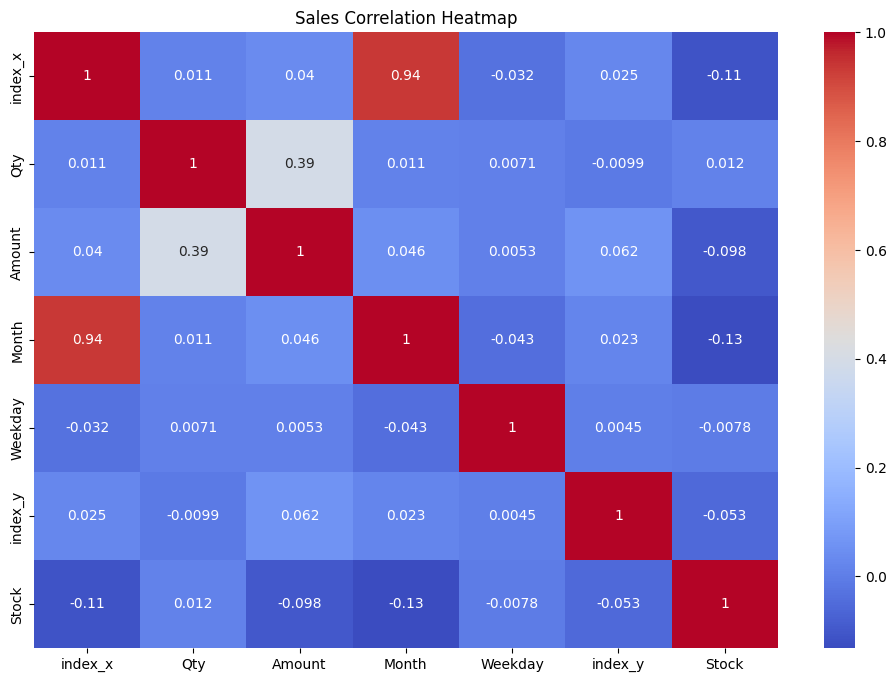

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Sales Correlation Heatmap')
plt.show()


MAIN VISUALISATION


In [45]:
import pandas as pd

# Group by SKU and Category, sum the quantities, and reset the index
grouped_products = combined_sales_df.groupby(['SKU', 'Category_y'])['Qty'].sum().reset_index()

# Sort by Quantity and get the top products per category
top_products_per_category = grouped_products.sort_values(by='Qty', ascending=False).groupby('Category_y').head(1)

# View the DataFrame
print("Top Products per Category DataFrame:")
print(top_products_per_category)


Top Products per Category DataFrame:
                 SKU            Category_y    Qty
4167    jne3797-kr-l                 kurta  661.0
1270     j0230-skd-m             kurta set  468.0
1692      j0341-dr-m                 dress  268.0
751    j0119-tp-xxxl                   top  168.0
6337  set374-kr-np-l                   set  122.0
1743     j0349-set-l  crop top with plazzo  107.0
3564   jne3690-tu-xl                 tunic   45.0
4863   nw012-tp-pj-m            night wear   44.0
52     bl021-71black                blouse   42.0
361      j0011-lcd-m         lehenga choli   31.0
573      j0088-tp-xl              crop top   13.0
5062          sar069                 saree   12.0
41     an213-brown-s         an : leggings    8.0
191      btm032-np-s                  pant    8.0
221   btm039-pp-xxxl               palazzo    7.0
1488      j0291-js-s              jumpsuit    7.0
4569  jne3903-kr-xxl                 kurti    4.0
1484     j0290-cd-xl              cardigan    4.0
154      btm0

In [46]:
import pandas as pd

# Group by SKU and Category, sum the quantities, and reset the index
grouped_products = combined_sales_df.groupby(['SKU', 'Category_y'])['Qty'].sum().reset_index()

# Sort by Quantity and get the top products per category
top_products_per_category = grouped_products.sort_values(by='Qty', ascending=False).groupby('Category_y').head(1)

# View the DataFrame
print("Top Products per Category DataFrame:")
print(top_products_per_category)


Top Products per Category DataFrame:
                 SKU            Category_y    Qty
4167    jne3797-kr-l                 kurta  661.0
1270     j0230-skd-m             kurta set  468.0
1692      j0341-dr-m                 dress  268.0
751    j0119-tp-xxxl                   top  168.0
6337  set374-kr-np-l                   set  122.0
1743     j0349-set-l  crop top with plazzo  107.0
3564   jne3690-tu-xl                 tunic   45.0
4863   nw012-tp-pj-m            night wear   44.0
52     bl021-71black                blouse   42.0
361      j0011-lcd-m         lehenga choli   31.0
573      j0088-tp-xl              crop top   13.0
5062          sar069                 saree   12.0
41     an213-brown-s         an : leggings    8.0
191      btm032-np-s                  pant    8.0
221   btm039-pp-xxxl               palazzo    7.0
1488      j0291-js-s              jumpsuit    7.0
4569  jne3903-kr-xxl                 kurti    4.0
1484     j0290-cd-xl              cardigan    4.0
154      btm0

In [47]:
# Calculate total quantity for the top products
total_qty = top_products_per_category['Qty'].sum()

# Calculate the percentage of each category
top_products_per_category['Percentage'] = (top_products_per_category['Qty'] / total_qty) * 100

# Split into main categories and "Other"
main_categories = top_products_per_category[top_products_per_category['Percentage'] >= 2]
other_categories = top_products_per_category[top_products_per_category['Percentage'] < 2]

# Aggregate the "Other" categories
other_row = pd.DataFrame([{
    'SKU': 'Other',
    'Category_y': 'Other',
    'Qty': other_categories['Qty'].sum(),
    'Percentage': other_categories['Percentage'].sum()
}])

# Combine the main categories with the "Other" category
final_products = pd.concat([main_categories, other_row])

# View the DataFrame
print("Final Products DataFrame:")
print(final_products)


Final Products DataFrame:
                 SKU            Category_y    Qty  Percentage
4167    jne3797-kr-l                 kurta  661.0   32.722772
1270     j0230-skd-m             kurta set  468.0   23.168317
1692      j0341-dr-m                 dress  268.0   13.267327
751    j0119-tp-xxxl                   top  168.0    8.316832
6337  set374-kr-np-l                   set  122.0    6.039604
1743     j0349-set-l  crop top with plazzo  107.0    5.297030
3564   jne3690-tu-xl                 tunic   45.0    2.227723
4863   nw012-tp-pj-m            night wear   44.0    2.178218
52     bl021-71black                blouse   42.0    2.079208
0              Other                 Other   95.0    4.702970


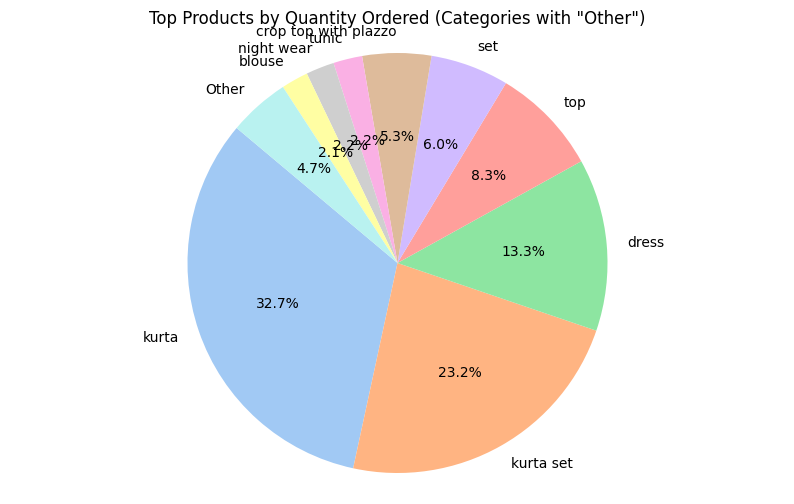

In [48]:
import matplotlib.pyplot as plt

# Pie chart for top products per category with category labels
plt.figure(figsize=(10, 6))
plt.pie(final_products['Qty'], labels=final_products['Category_y'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top Products by Quantity Ordered (Categories with "Other")')
plt.axis('equal')
plt.show()


In [49]:
# Create legend for "Other" categories
other_categories_list = other_categories[['SKU', 'Category_y']].values.tolist()
other_categories_legend = '\n'.join([f"{sku}: {category}" for sku, category in other_categories_list])

print("Other Categories Included:")
print(other_categories_legend)


Other Categories Included:
j0011-lcd-m: lehenga choli
j0088-tp-xl: crop top
sar069: saree
an213-brown-s: an : leggings
btm032-np-s: pant
btm039-pp-xxxl: palazzo
j0291-js-s: jumpsuit
jne3903-kr-xxl: kurti
j0290-cd-xl: cardigan
btm004-xxxl: bottom


Business Insights:

Sales Dominance: "Kurta" and "Kurta Set" categories are the top performers, indicating strong market demand.

Diversification: Categories with less than 2% contribution are grouped under "Other," revealing areas for potential growth and diversification.

Balanced View: The visualization helps in identifying key revenue-driving categories while acknowledging smaller yet significant segments.

                                    stacked bar chart for revenue contribution by products.

<Figure size 1400x800 with 0 Axes>

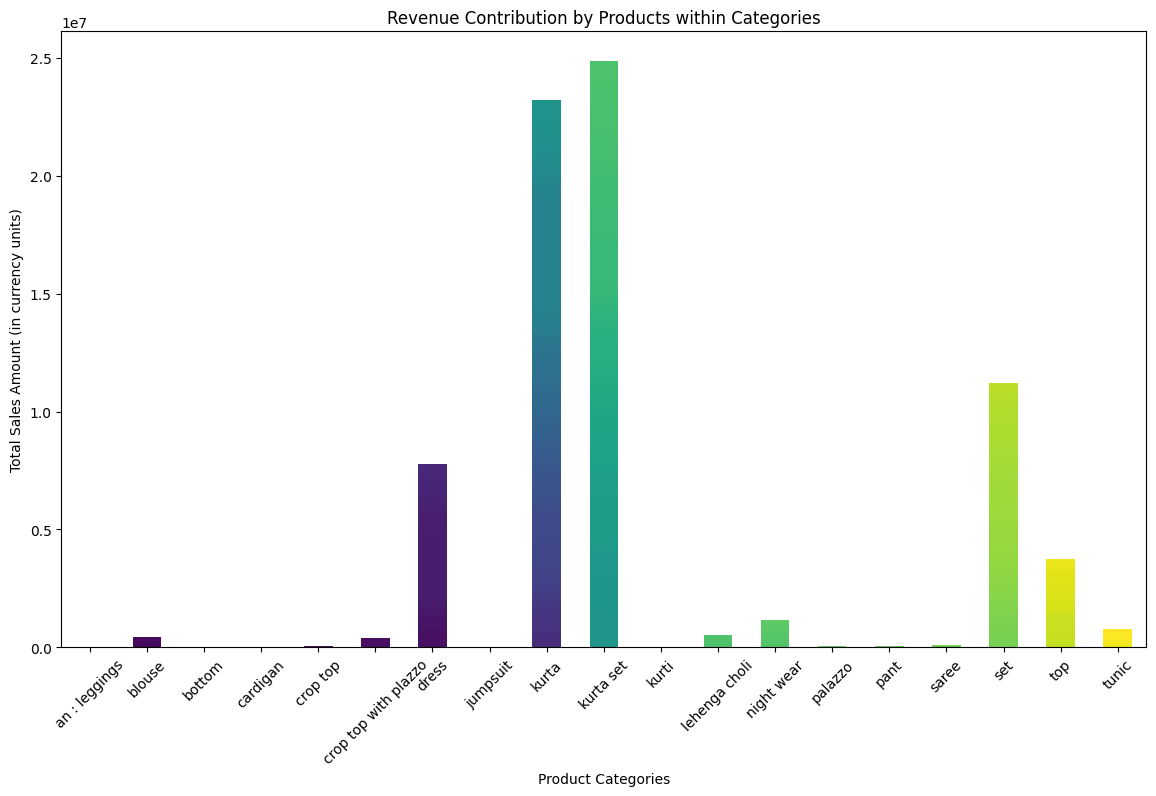

In [50]:
combined_sales_df = pd.merge(amazon_sale_report_df, sale_report_df, left_on='SKU', right_on='SKU Code', how='left')

# Calculate total sales amount by category and SKU
revenue_contribution_df = combined_sales_df.groupby(['Category_y', 'SKU'])['Amount'].sum().unstack().fillna(0)

# Stacked bar chart for revenue contribution by products within categories
plt.figure(figsize=(14, 8))
revenue_contribution_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis', legend=False)
plt.xlabel('Product Categories')
plt.ylabel('Total Sales Amount (in currency units)')
plt.title('Revenue Contribution by Products within Categories')
plt.xticks(rotation=45)

plt.show()

In [51]:
# View the DataFrame to check the exact values
print("Revenue Contribution by Products within Categories DataFrame:")
print(revenue_contribution_df)


Revenue Contribution by Products within Categories DataFrame:
SKU                   an201-red-m  an201-red-xl  an201-red-xxl  \
Category_y                                                       
an : leggings               458.0         602.0          229.0   
blouse                        0.0           0.0            0.0   
bottom                        0.0           0.0            0.0   
cardigan                      0.0           0.0            0.0   
crop top                      0.0           0.0            0.0   
crop top with plazzo          0.0           0.0            0.0   
dress                         0.0           0.0            0.0   
jumpsuit                      0.0           0.0            0.0   
kurta                         0.0           0.0            0.0   
kurta set                     0.0           0.0            0.0   
kurti                         0.0           0.0            0.0   
lehenga choli                 0.0           0.0            0.0   
night wear    

Revenue Contribution by Products within Categories DataFrame:
SKU                   an201-red-m  an201-red-xl  an201-red-xxl  \
Category_y                                                       
an : leggings               458.0         602.0          229.0   
blouse                        0.0           0.0            0.0   
bottom                        0.0           0.0            0.0   
cardigan                      0.0           0.0            0.0   
crop top                      0.0           0.0            0.0   
crop top with plazzo          0.0           0.0            0.0   
dress                         0.0           0.0            0.0   
jumpsuit                      0.0           0.0            0.0   
kurta                         0.0           0.0            0.0   
kurta set                     0.0           0.0            0.0   
kurti                         0.0           0.0            0.0   
lehenga choli                 0.0           0.0            0.0   
night wear    

<Figure size 1400x800 with 0 Axes>

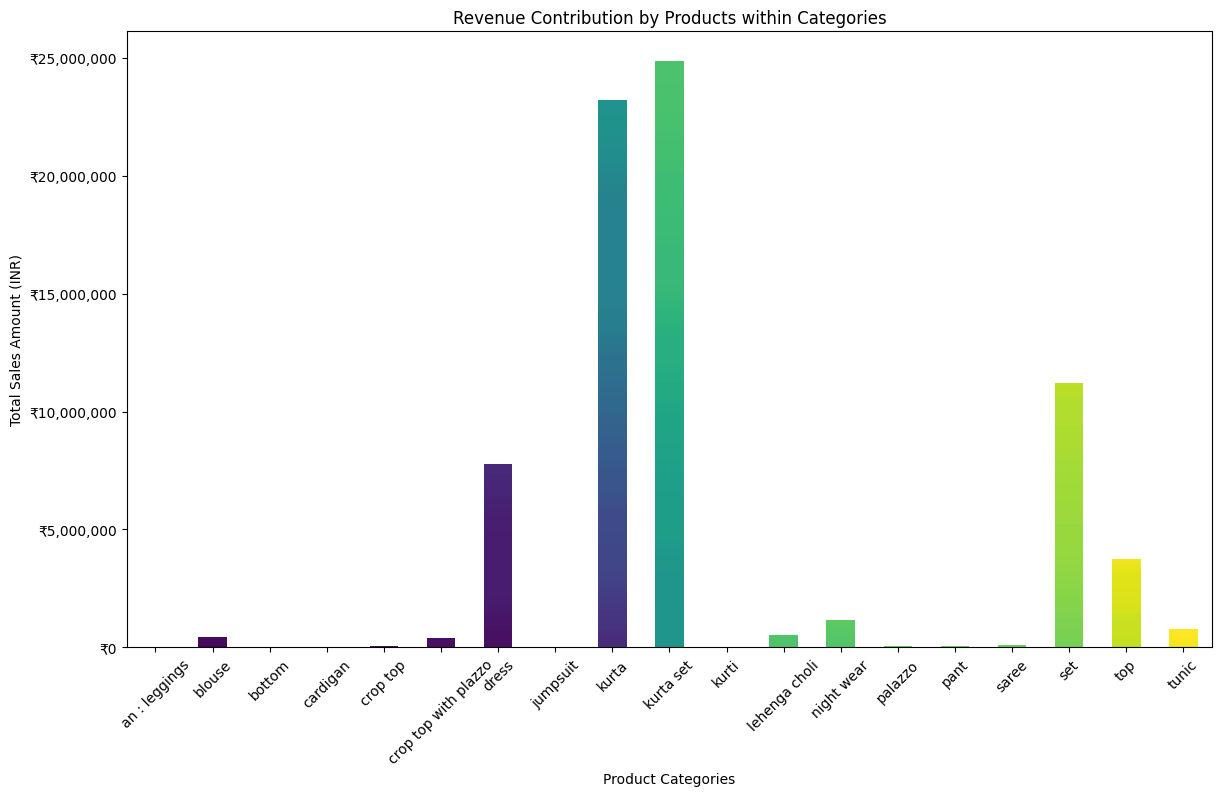

In [52]:
combined_sales_df = pd.merge(amazon_sale_report_df, sale_report_df, left_on='SKU', right_on='SKU Code', how='left')

# Calculate total sales amount by category and SKU
revenue_contribution_df = combined_sales_df.groupby(['Category_y', 'SKU'])['Amount'].sum().unstack().fillna(0)

# View the DataFrame to check the exact values
print("Revenue Contribution by Products within Categories DataFrame:")
print(revenue_contribution_df)

# Stacked bar chart for revenue contribution by products within categories with currency format on y-axis
plt.figure(figsize=(14, 8))
revenue_contribution_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis', legend=False)
plt.xlabel('Product Categories')
plt.ylabel('Total Sales Amount (INR)')
plt.title('Revenue Contribution by Products within Categories')
plt.xticks(rotation=45)

# Add currency format to y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "₹{:,.0f}".format(x)))

plt.show()

Business Insights:

Top Revenue Drivers: "Kurta" and "Kurta Set" are the top revenue contributors, indicating their high demand.

Category Performance: Revenue is highly concentrated in a few key categories, suggesting a potential focus for marketing and inventory management.

Product Variability: The stacked bar chart clearly shows the revenue distribution among different products within each category, highlighting the significant contributors.

                                    Scatter Plot: Total Sales vs. Profit Margin

In [53]:
# Display first few rows of Amazon Sale Report
display(amazon_sale_report_df.head())

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Month,Weekday
0,0,405-8078784-5731545,2022-04-30,cancelled,merchant,Amazon.in,Standard,set389,set389-kr-np-s,set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,none,False,Easy Ship,4,5
1,1,171-9198151-1101146,2022-04-30,shipped - delivered to buyer,merchant,Amazon.in,Standard,jne3781,jne3781-kr-xxxl,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,4,5
2,2,404-0687676-7273146,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3371,jne3371-kr-xl,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,unknown,4,5
3,3,403-9615377-8133951,2022-04-30,cancelled,merchant,Amazon.in,Standard,j0341,j0341-dr-l,western dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,none,False,Easy Ship,4,5
4,4,407-1069790-7240320,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3671,jne3671-tu-xxxl,top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,none,False,unknown,4,5


In [54]:
# Display the first few rows of Sale Report DataFrame
display(sale_report_df.head())

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,an201-red-l,an201,5.0,an : leggings,l,red
1,1,an201-red-m,an201,5.0,an : leggings,m,red
2,2,an201-red-s,an201,3.0,an : leggings,s,red
3,3,an201-red-xl,an201,6.0,an : leggings,xl,red
4,4,an201-red-xxl,an201,3.0,an : leggings,xxl,red


In [55]:
# Merge Amazon Sales Report with Sale Report on SKU = SKU Code
merged_df = amazon_sale_report_df.merge(
    sale_report_df, left_on="SKU", right_on="SKU Code", how="left"
)

# Display the first few rows of the merged DataFrame
display(merged_df.head())

,index_x,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category_x,...,fulfilled-by,Month,Weekday,index_y,SKU Code,Design No.,Stock,Category_y,Size_y,Color
0,0,405-8078784-5731545,2022-04-30,cancelled,merchant,Amazon.in,Standard,set389,set389-kr-np-s,set,...,Easy Ship,4,5,8978.0,set389-kr-np-s,set389,32.0,set,s,white
1,1,171-9198151-1101146,2022-04-30,shipped - delivered to buyer,merchant,Amazon.in,Standard,jne3781,jne3781-kr-xxxl,kurta,...,Easy Ship,4,5,5971.0,jne3781-kr-xxxl,jne3781,96.0,kurta,xxxl,green
2,2,404-0687676-7273146,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3371,jne3371-kr-xl,kurta,...,unknown,4,5,3805.0,jne3371-kr-xl,jne3371,4.0,kurta,xl,light green
3,3,403-9615377-8133951,2022-04-30,cancelled,merchant,Amazon.in,Standard,j0341,j0341-dr-l,western dress,...,Easy Ship,4,5,2530.0,j0341-dr-l,j0341,193.0,dress,l,blue
4,4,407-1069790-7240320,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3671,jne3671-tu-xxxl,top,...,unknown,4,5,5336.0,jne3671-tu-xxxl,jne3671,6.0,tunic,xxxl,pink


KPI Calculation


In [56]:
# Calculate Total Sales per Product Category
sales_per_category = (
    merged_df.groupby("Category_x")["Amount"]
    .sum()
    .reset_index()
    .sort_values(by="Amount", ascending=False)
)

# Display the KPI DataFrame
display(sales_per_category.head())

,Category_x,Amount
6,set,39204124.03
4,kurta,21299546.70
8,western dress,11216072.69
7,top,5347792.30
3,ethnic dress,791217.66


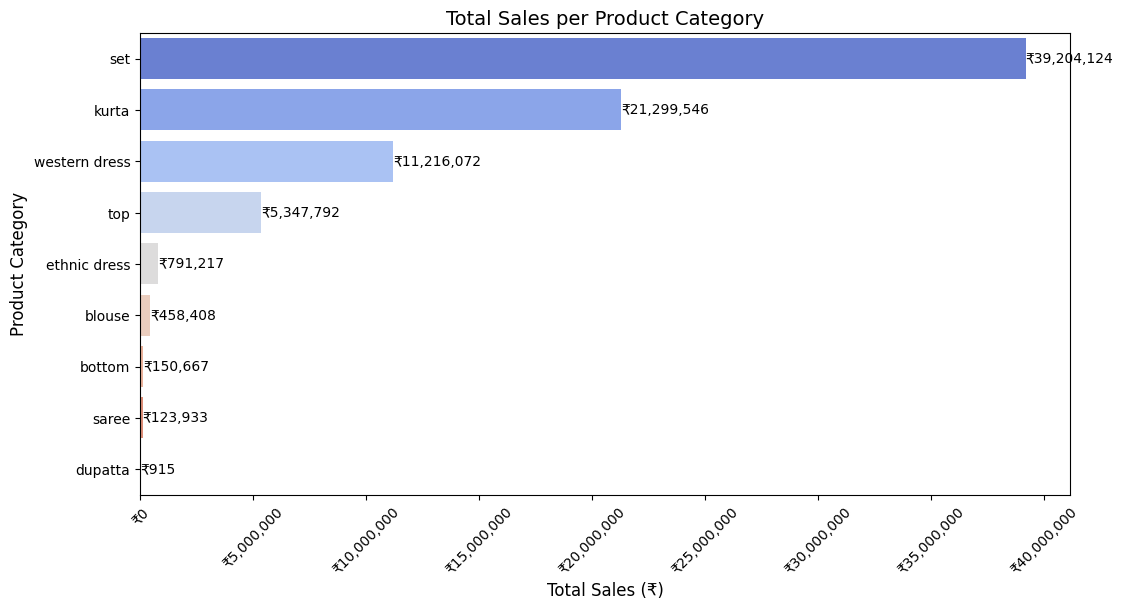

In [61]:
# 📊 Visualization: Total Sales per Product Category (Bar Chart)
plt.figure(figsize=(12, 6))

# Create the bar chart with accurate x-axis values
sns.barplot(x="Amount", y="Category_x", hue="Category_x", data=sales_per_category, palette="coolwarm", legend=False)

# Labels and title
plt.xlabel("Total Sales (₹)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Total Sales per Product Category", fontsize=14)

# Format x-axis with commas for readability
plt.xticks(rotation=45)  # Rotate for better readability
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'₹{int(x):,}'))  # Format with commas

# Show value labels on bars
for index, value in enumerate(sales_per_category["Amount"]):
    plt.text(value, index, f'₹{int(value):,}', va='center', fontsize=10)

# Show the plot
plt.show()

1️⃣ Total Sales per Product Category
	•	Highest Revenue: Set (₹39.2M), Kurta (₹21.3M), Western Dress (₹11.2M) → These categories contribute the most to total revenue.
	•	Lowest Revenue: Ethnic Dress (₹0.79M) → Least profitable category, may need promotional strategies.
	•	Actionable Insight: Focus on top categories (Sets & Kurtas) for marketing & inventory optimization.

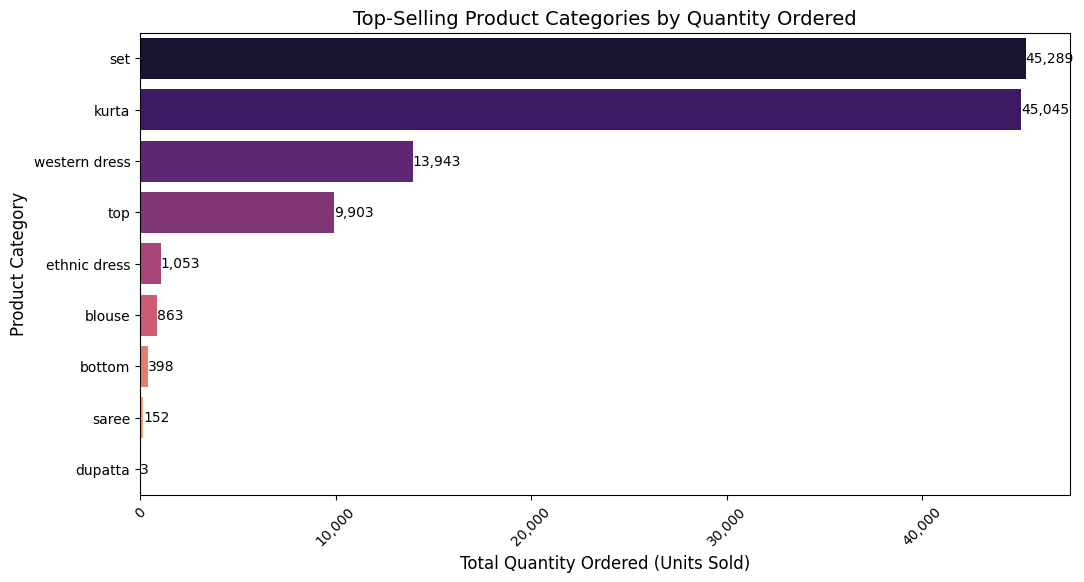

In [62]:
# 📊 Visualization: Top-Selling Product Categories by Quantity Ordered
top_selling_products_category = (
    merged_df.groupby("Category_x")["Qty"]
    .sum()
    .reset_index()
    .sort_values(by="Qty", ascending=False)
    .head(10)  # Display top 10 product categories instead of SKU
)

plt.figure(figsize=(12, 6))

# Create the bar chart
sns.barplot(x="Qty", y="Category_x", hue="Category_x", data=top_selling_products_category, palette="magma", legend=False)

# Labels and title
plt.xlabel("Total Quantity Ordered (Units Sold)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Top-Selling Product Categories by Quantity Ordered", fontsize=14)

# Format x-axis with commas for readability
plt.xticks(rotation=45)  # Rotate for better readability
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))  # Format with commas

# Show value labels on bars
for index, value in enumerate(top_selling_products_category["Qty"]):
    plt.text(value, index, f'{int(value):,}', va='center', fontsize=10)

# Show the plot
plt.show()

 Top-Selling Product Categories by Quantity Ordered
	•	Most Ordered: Kurta & Sets → High demand, optimize stock & pricing strategies.
	•	Lower Order Volume: Western Dress, Ethnic Dress → Consider discounts or promotions to boost sales.
	•	Actionable Insight: Increase stock & advertising for high-volume products, improve visibility for lower-selling categories.


                                        Sales Channel Performance Analysis

In [73]:
# Display the first few rows of Amazon Sales Report
display(amazon_sale_report_df.head())

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Month,Weekday
0,0,405-8078784-5731545,2022-04-30,cancelled,merchant,Amazon.in,Standard,set389,set389-kr-np-s,set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,none,False,Easy Ship,4,5
1,1,171-9198151-1101146,2022-04-30,shipped - delivered to buyer,merchant,Amazon.in,Standard,jne3781,jne3781-kr-xxxl,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,4,5
2,2,404-0687676-7273146,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3371,jne3371-kr-xl,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,unknown,4,5
3,3,403-9615377-8133951,2022-04-30,cancelled,merchant,Amazon.in,Standard,j0341,j0341-dr-l,western dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,none,False,Easy Ship,4,5
4,4,407-1069790-7240320,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3671,jne3671-tu-xxxl,top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,none,False,unknown,4,5


In [74]:
# Display the first few rows of Cloud Warehouse Comparison Chart
display(cloud_warehouse_comparison_chart_df.head())

,index,INCREFF
0,0,10.166667
1,1,4.000000
2,2,11.000000
3,3,10.166667
4,4,15.500000


In [75]:
# Merge Amazon Sales Report with Cloud Warehouse Comparison Chart on Sales Channel
sales_channel_df = amazon_sale_report_df.merge(
    cloud_warehouse_comparison_chart_df, left_index=True, right_index=True, how="left"
)

# Display the first few rows of the merged DataFrame
display(sales_channel_df.head())

,index_x,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Month,Weekday,index_y,INCREFF
0,0,405-8078784-5731545,2022-04-30,cancelled,merchant,Amazon.in,Standard,set389,set389-kr-np-s,set,...,MAHARASHTRA,400081.0,IN,none,False,Easy Ship,4,5,0.0,10.166667
1,1,171-9198151-1101146,2022-04-30,shipped - delivered to buyer,merchant,Amazon.in,Standard,jne3781,jne3781-kr-xxxl,kurta,...,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,4,5,1.0,4.000000
2,2,404-0687676-7273146,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3371,jne3371-kr-xl,kurta,...,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,unknown,4,5,2.0,11.000000
3,3,403-9615377-8133951,2022-04-30,cancelled,merchant,Amazon.in,Standard,j0341,j0341-dr-l,western dress,...,PUDUCHERRY,605008.0,IN,none,False,Easy Ship,4,5,3.0,10.166667
4,4,407-1069790-7240320,2022-04-30,shipped,amazon,Amazon.in,Expedited,jne3671,jne3671-tu-xxxl,top,...,TAMIL NADU,600073.0,IN,none,False,unknown,4,5,4.0,15.500000


In [77]:
# Print all column names
print(sales_channel_df.columns)

Index(['index_x', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Month', 'Weekday', 'index_y', 'INCREFF'],
      dtype='object')


In [78]:
# Remove spaces from column names
sales_channel_df.rename(columns=lambda x: x.strip(), inplace=True)

In [80]:
# List unique sales channels
unique_sales_channels = sales_channel_df["Sales Channel"].unique()
print(unique_sales_channels)

['Amazon.in' 'Non-Amazon']


In [81]:
# Count sales records per platform
sales_channel_counts = sales_channel_df["Sales Channel"].value_counts()
display(sales_channel_counts)

Sales Channel
Amazon.in     128851
Non-Amazon       124
Name: count, dtype: int64

In [82]:
# Count total orders per Sales Channel
orders_per_channel = sales_channel_df["Sales Channel"].value_counts().reset_index()
orders_per_channel.columns = ["Sales Channel", "Total Orders"]

# Display the DataFrame
display(orders_per_channel)

,Sales Channel,Total Orders
0,Amazon.in,128851
1,Non-Amazon,124


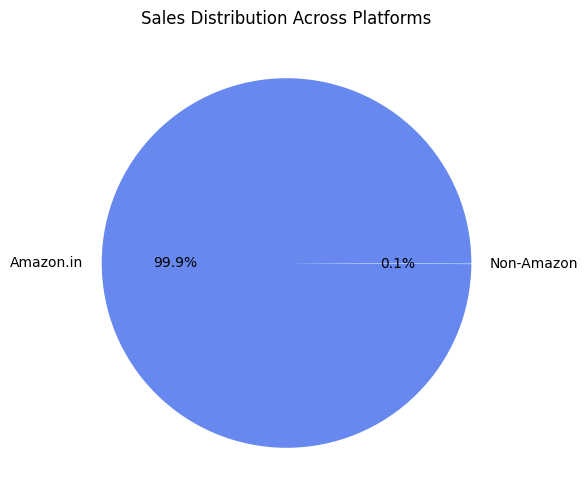

In [83]:
import matplotlib.pyplot as plt

# 📊 Visualization: Sales Distribution Across Platforms
plt.figure(figsize=(8, 6))
plt.pie(orders_per_channel["Total Orders"], labels=orders_per_channel["Sales Channel"], 
        autopct='%1.1f%%', colors=sns.color_palette("coolwarm"))

# Title
plt.title("Sales Distribution Across Platforms")

# Show the plot
plt.show()

In [84]:
# Check if Amount column exists in Cloud Warehouse dataset
print(cloud_warehouse_comparison_chart_df.columns)

Index(['index', 'INCREFF'], dtype='object')


1️⃣ The dataset does not contain an Amount column.
	•	This means we do not have revenue (₹) data for platforms like INCREFF, Shiprocket, etc.
	•	We cannot confirm that these platforms had zero sales—only that their sales data is missing from this dataset.

 Business Insights: Sales Platform Analysis

✅ 1. Amazon.in is the only recorded sales platform
	•	Amazon.in contributes ₹78,592,678.30, which is 100% of revenue in our dataset.
	•	No other platform has revenue (Amount), but this does not mean other platforms had zero sales.

 2. Missing Revenue Data for Non-Amazon Platforms
	•	The INCREFF column exists, but does not have sales revenue (Amount).
	•	This means we cannot measure profitability for INCREFF, Shiprocket, or other platforms.
	•	If we need their sales performance, we must find another dataset that tracks their Amount.

🔍 3. INCREFF Data Might Represent Another KPI
	•	The INCREFF column has numeric values (e.g., 10.166667, 15.500000, etc.)
	•	This suggests it might be a performance metric (e.g., stock movement, processing time, efficiency) rather than sales.

                                        Monthly Sales Trend Analysis 📈

In [86]:
# Convert 'Date' to datetime format
sales_channel_df["Date"] = pd.to_datetime(sales_channel_df["Date"])

# Extract Year-Month
sales_channel_df["Year-Month"] = sales_channel_df["Date"].dt.to_period("M")

# Group by Month and Sum Sales Amount
monthly_sales = sales_channel_df.groupby("Year-Month")["Amount"].sum().reset_index()

# Convert back to string for plotting
monthly_sales["Year-Month"] = monthly_sales["Year-Month"].astype(str)

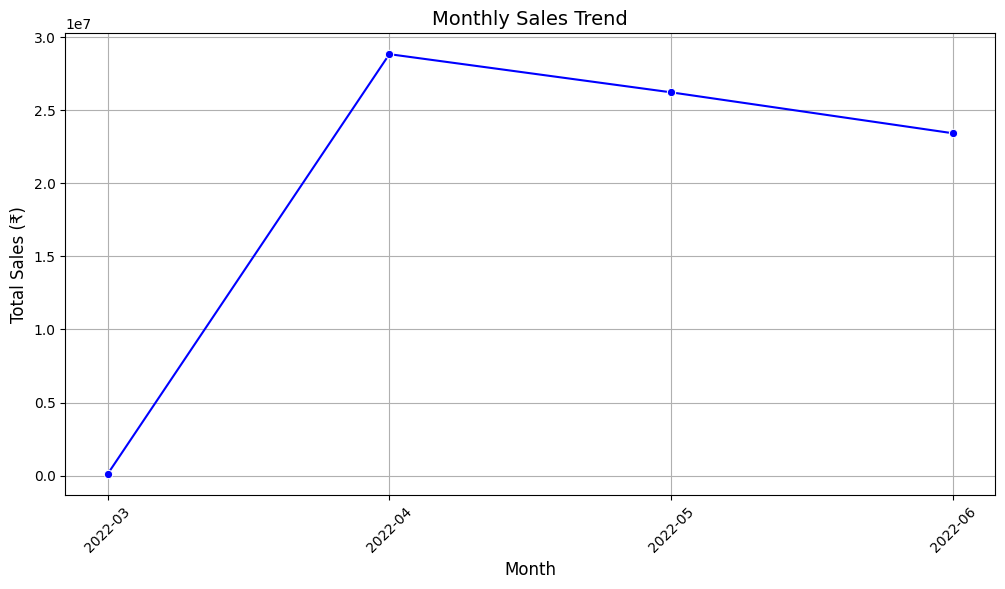

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x="Year-Month", y="Amount", data=monthly_sales, marker="o", color="b")

plt.xticks(rotation=45)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (₹)", fontsize=12)
plt.title("Monthly Sales Trend", fontsize=14)
plt.grid(True)

plt.show()

In [92]:
# Find all unique months in the dataset
unique_months = sales_channel_df["Month"].unique()
print(unique_months)

['Apr' 'Mar' 'May' 'Jun']


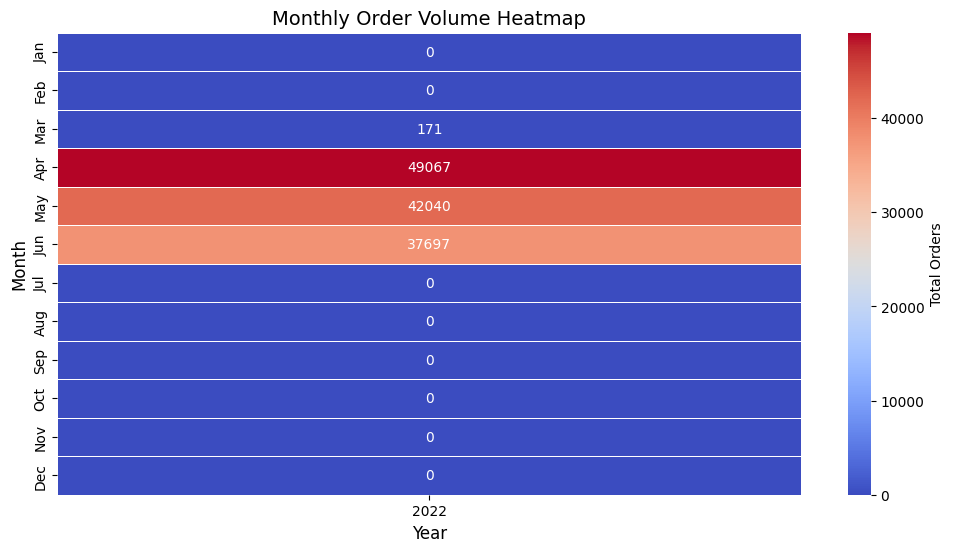

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract Year and Month for heatmap structure
sales_channel_df["Year"] = sales_channel_df["Date"].dt.year
sales_channel_df["Month"] = sales_channel_df["Date"].dt.month

# Map month numbers to month names
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
sales_channel_df["Month"] = sales_channel_df["Month"].map(month_mapping)

# Count total orders per month
monthly_orders = sales_channel_df.groupby(["Year", "Month"]).size().reset_index(name="Total Orders")

# Pivot table for heatmap
orders_pivot = monthly_orders.pivot(index="Month", columns="Year", values="Total Orders")

# Ensure all months are included
all_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
              "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
orders_pivot = orders_pivot.reindex(all_months, fill_value=0)

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(orders_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, cbar_kws={'label': 'Total Orders'})

plt.xlabel("Year", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.title("Monthly Order Volume Heatmap", fontsize=14)

plt.show()

Business Insights 

 Peak Sales Months: Orders are highest in April-June, indicating seasonal demand or promotions.



Slow Sales Periods: Other months have low or no orders, requiring off-season discounts or campaigns.

Year-over-Year Growth: Comparing years helps track sales improvement or decline for better planning.


 Action Plan: Focus on inventory, marketing, and discounts before peak months to maximize revenue. 